In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from os import path
sys.path.append('/Users/mingxidai/Documents/project/trajectory-search/src/features')
from helper import *

# Read in trajectory data

### specify data and top k

In [2]:
query = 'gps_20161003_trajectory'
train = 'gps_20161002_trajectory'
query_num=50

### load data

In [3]:
query_path = '../data/processed/%s.txt' % query
train_path = '../data/processed/%s.txt' % train
query_id_dict_path = '../data/interim/%s/%s/query_id_dict.txt' % (query, train)
rtree_id_dict_path = '../data/interim/%s/rtree_id_dict.txt' % train

In [4]:
query_id_dict = read_pickle(query_id_dict_path)
query_id_dict = {v: k for k, v in query_id_dict.items()} 
query_id_dict

{1: '1040904b87fe12ec86c8c2622c95ff81',
 8: '2d2323a6a37ee7af71769fd18c6598e8',
 44: 'e8b829366fcaee4b2c152538dc60d9bb',
 35: 'b88f20ad0a48e6baff081a54a49e5b80',
 46: 'eab14eb00d5d1c592cccdc01a0da355d',
 37: 'be3925761b23335d1175652b9ba41e13',
 38: 'c0e10f382633ab2b687b5ca1f42cab8b',
 24: '97de19db06651a31ec90ea38b058fd35',
 40: 'c2ee4e8509971091a8054f97d9a53503',
 3: '1c31243e4536f5a1a1ad8040cb4db905',
 49: 'f4dce0c192ce4a7c6635cb7057253887',
 47: 'edde72691118837f0e9b6e2b5347a7e5',
 48: 'f084e4f89191b17923eef73117098093',
 22: '8250d911428b8ce71f322e388a42a10c',
 23: '94f21b045bf007a3d177c476096f2c49',
 26: '9a45fd37da43d94cb0b42843df5c035c',
 32: 'b040b10f94c2901fff7c0bf8e684e4f0',
 7: '27d5386dd8704d6bef9fd62600f87ffd',
 25: '99911dca3ad4b7df5af9bf9d95eee180',
 28: 'a20696500597d35a82fdeaee159db4a2',
 42: 'c9620ab4453fbe52c7e59b15a3b2e008',
 14: '588ff58e9b22a97b28950740e45b9da2',
 33: 'b2af4a0472d617de68fbd7092de16921',
 41: 'c68188b629b49fe3261eef37f5cb97e0',
 6: '27946c8be7bbb65

In [5]:
train_id_dict = read_pickle(rtree_id_dict_path)
train_id_dict

{0: '00005afe7a74bffce9b57ddbf5ad705e',
 1: '0001416e564707c1de5c7be2f67bb329',
 2: '00014d9089d1bcca19739d72d187410b',
 3: '0001a2fbf98908b7575b1a7e0a4879a6',
 4: '0002654bd3b5dd573625dba8ff338bc4',
 5: '00031c6c8d05c155481e7c50c6adb9b3',
 6: '0003ba042c31f07dad53df5c84da6881',
 7: '00040a237fe55de1fbe83297da0760fe',
 8: '00040a897788d7783800870a879c6431',
 9: '000497cca9408977b4972c244315008a',
 10: '0004a808a5b76e2992a6c74eacea5b0b',
 11: '0004cf1bc3f3fa55e49b492ca3b584d0',
 12: '0006f456a85bcbc9d23aac7339da8994',
 13: '00074547a66cf9fc03cd39475b7ccc02',
 14: '0007fc99bbb95c9e83131bc05910450c',
 15: '00086e3ae6ec633a05c2c5695cd05bd3',
 16: '000d83888ca43f7f3bd400c0999ded1e',
 17: '000de174690b4e718962344732908cd8',
 18: '000e09d39aa46bc1e0b997688e350e79',
 19: '0010532c276c6e9c21d260783f9f2d82',
 20: '00105c3ab04dd1ba2dae2668c71ab28d',
 21: '001068001d9f42cdbdeaa2310f93cdb1',
 22: '0010fff8a4ff704828e73252f44b72ca',
 23: '001303ba0f21fb89e0b4fa41b780a095',
 24: '001376f2d841c04ab725

In [6]:
query_data = load_trajectory(query_path, n=query_num)
query_data

{'5854ff08676fbd89069bd9e6a37bd065': [(108.95376, 34.23912),
  (108.95376, 34.23912),
  (108.95376, 34.23912),
  (108.95376, 34.23912),
  (108.95387, 34.23904),
  (108.95387, 34.23904),
  (108.95387, 34.23904),
  (108.95387, 34.23904),
  (108.95387, 34.2391),
  (108.95387, 34.23922),
  (108.95387, 34.23935),
  (108.95387, 34.23949),
  (108.95387, 34.23967),
  (108.95387, 34.23984),
  (108.95387, 34.24003),
  (108.95388, 34.2402),
  (108.95388, 34.24032),
  (108.95388, 34.24046),
  (108.95388, 34.24062),
  (108.95388, 34.24078),
  (108.95388, 34.24088),
  (108.95388, 34.24096),
  (108.95388, 34.24096),
  (108.95408, 34.24107),
  (108.95421, 34.24107),
  (108.95439, 34.24107),
  (108.95462, 34.24107),
  (108.95487, 34.24107),
  (108.95514, 34.24107),
  (108.95542, 34.24107),
  (108.9557, 34.24107),
  (108.95595, 34.24107),
  (108.95619, 34.24108),
  (108.95643, 34.24108),
  (108.95654, 34.24109),
  (108.95676, 34.24109),
  (108.95685, 34.24109),
  (108.95706, 34.2411),
  (108.95727, 34.2

In [7]:
train_data = load_trajectory(train_path)
train_data

{'fd0154bc42cdb411c484a5bdd049c133': [(108.95565, 34.21827),
  (108.95565, 34.21827),
  (108.95565, 34.21827),
  (108.95565, 34.21827),
  (108.95565, 34.21827),
  (108.95555, 34.21827),
  (108.9554, 34.21828),
  (108.95523, 34.21828),
  (108.95499, 34.21828),
  (108.95471, 34.21828),
  (108.95443, 34.21828),
  (108.9541, 34.21829),
  (108.95372, 34.21829),
  (108.95332, 34.21829),
  (108.9529, 34.21829),
  (108.95249, 34.21829),
  (108.95209, 34.21829),
  (108.95167, 34.21829),
  (108.95124, 34.21829),
  (108.95083, 34.21829),
  (108.95038, 34.2183),
  (108.94989, 34.21829),
  (108.94938, 34.21829),
  (108.94884, 34.21828),
  (108.94833, 34.21826),
  (108.94789, 34.21826),
  (108.94754, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.9474, 34.21825),
  (108.94722, 34.21825),
  (108.94703, 34.21824),
  (

### Specify query trajectory

In [8]:
query_key = '29'
result_path = '../data/result/%s/%s/query_%s.txt' % (query, train, query_key)
truth_path = '../data/truth/%s/%s/query_%s.txt' % (query, train, query_key)

In [10]:
top_k=10

In [11]:
result_top_k = load_top_k(result_path, k=top_k)
result_top_k

[27044, 82495, 22584, 34854, 34647, 4349, 7477, 17679, 39096, 59506]

In [12]:
truth_top_k = load_top_k(truth_path, k=top_k)
truth_top_k

[27044, 82495, 22584, 34854, 62992, 34647, 61254, 7477, 4349, 60665]

In [13]:
acc = sum([int(e in truth_top_k) for e in result_top_k])/len(result_top_k)
print('accuracy of top %d is: %d%%' %(top_k, acc*100))

accuracy of top 10 is: 70%


# Plot Qgramk-NNIndex top K

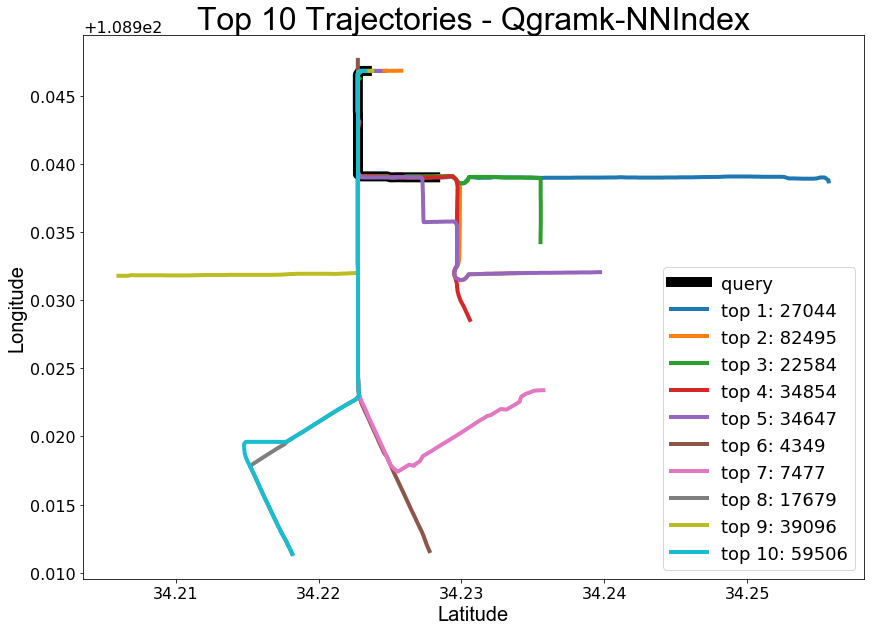

In [14]:
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'size':'18'}
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14,10)) 
traj_x, traj_y = build_coordinate(query_id_dict[int(query_key)], query_data)
plt.plot(traj_x, traj_y, color = 'black', linewidth=10, label = 'query')
for i in range(top_k):
    key = result_top_k[i]
    traj_x, traj_y = build_coordinate(train_id_dict[key], train_data)
    plt.plot(traj_x, traj_y, linewidth=4, label= 'top %s: %s' % (str(i+1), key))
plt.legend(prop=legend_font)
plt.title('Top %s Trajectories - Qgramk-NNIndex' % top_k, **title_font)
plt.xlabel('Latitude', **axis_font)
plt.ylabel('Longitude', **axis_font)
plt.show()

# Plot ground truth top K

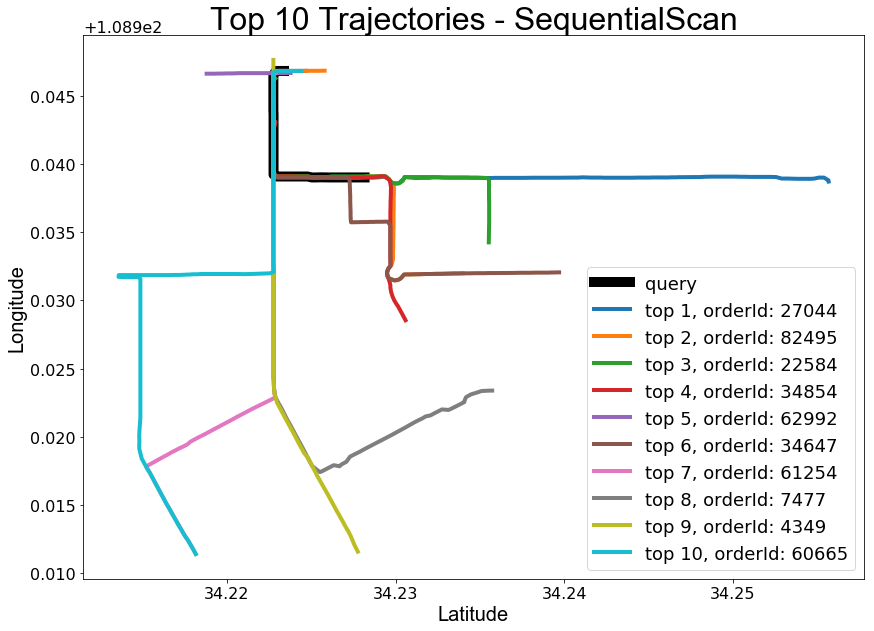

In [15]:
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'size':'18'}
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14,10)) 
traj_x, traj_y = build_coordinate(query_id_dict[int(query_key)], query_data)
plt.plot(traj_x, traj_y, color = 'black', linewidth=10, label = 'query')
for i in range(top_k):
    key = truth_top_k[i]
    traj_x, traj_y = build_coordinate(train_id_dict[key], train_data)
    plt.plot(traj_x, traj_y, linewidth=4, label= 'top %s, orderId: %s' % (str(i+1), key))
plt.legend(prop=legend_font)
plt.title('Top %s Trajectories - SequentialScan' % top_k, **title_font)
plt.xlabel('Latitude', **axis_font)
plt.ylabel('Longitude', **axis_font)
plt.show()